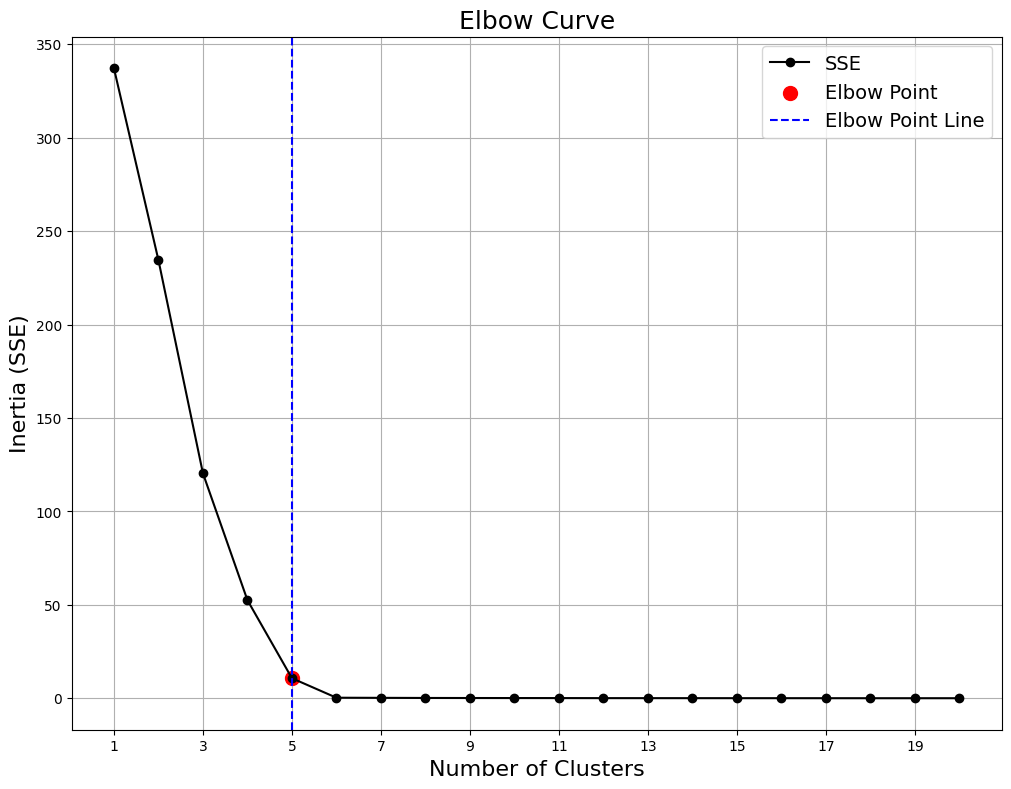

The elbow point is at 5 clusters.
Silhouette Score for 5 clusters: 0.954


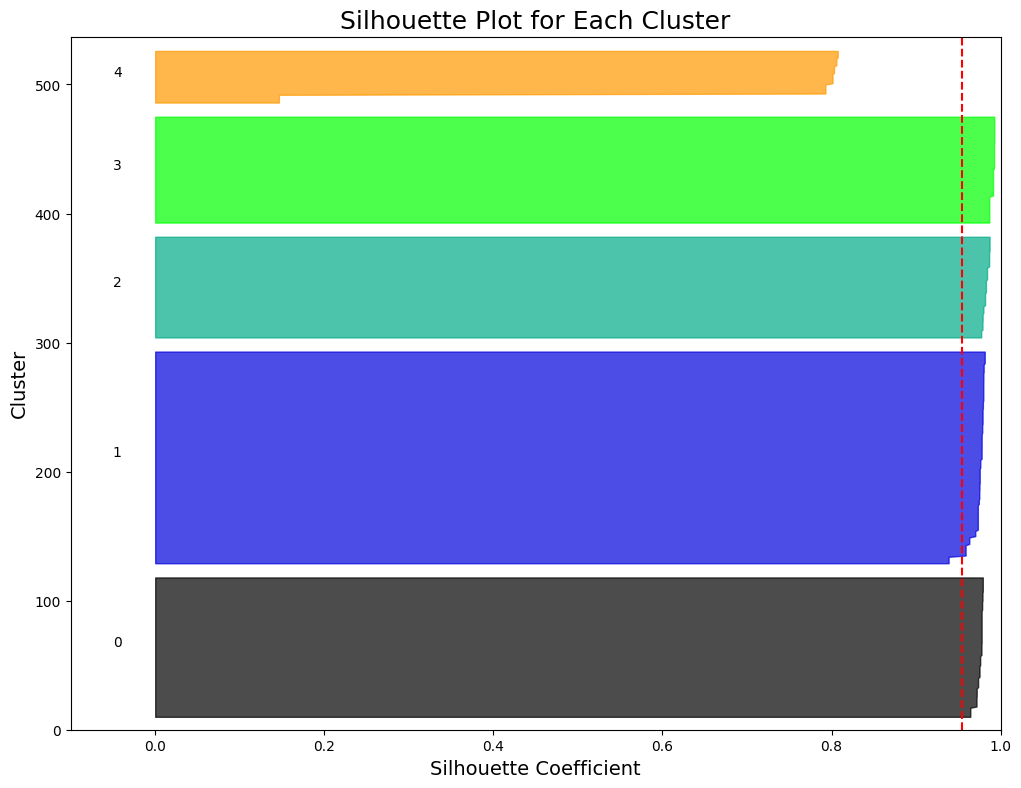

Davies-Bouldin Index for 5 clusters: 0.320
Bootstrapped Silhouette Scores: [0.9555528800684551, 0.9576780297356859, 0.948251581809664, 0.9326228627175952, 0.9464473024555049]
Mean Bootstrapped Silhouette Score: 0.948
Cluster Summary:
          Quantum dot  Graphene  Carbon black powder       CNT  \
Cluster                                                         
0           0.000000  0.000000             0.000000  0.967573   
1           0.000000  0.000000             0.968167  0.000000   
2           0.000000  0.946722             0.000000  0.000000   
3           0.000000  0.000000             0.000000  0.000000   
4           0.160612  0.000000             0.000000  0.000000   

         Mesoporous Carbon  Carbon Foam  Pyridinic-N  Pyrrolic-N  Graphitic-N  \
Cluster                                                                         
0                 0.000000     0.000000     0.013745    0.005649     0.011295   
1                 0.000000     0.000000     0.007064    0.006425  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn.utils import resample

# Load data
AA = "C:/Users/ganes/onedrive/Desktop/AI/NCCO2R/NC-Final.xlsx"
X = pd.read_excel(AA, usecols='A:L')
Y = pd.read_excel(AA, usecols='R')

# Step 1: Determine the optimal number of clusters using the elbow method
sse = []
for E in range(1, 21):
    kmeans = KMeans(n_clusters=E, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Function to calculate the elbow point
def find_elbow_point(sse):
    x = range(1, len(sse) + 1)
    line = np.array([x[0], sse[0], x[-1], sse[-1]])
    distances = []
    for i in range(len(sse)):
        x0, y0 = line[0], line[1]
        x1, y1 = line[2], line[3]
        m = (y1 - y0) / (x1 - x0)
        c = y0 - m * x0
        distance = abs(m * x[i] - sse[i] + c) / np.sqrt(m**2 + 1)
        distances.append(distance)
    return distances.index(max(distances)) + 1

# Find the elbow point
elbow_point = find_elbow_point(sse)

# Plot the elbow curve with the elbow point marked
plt.figure(figsize=(12, 9))
plt.plot(range(1, 21), sse, "k", marker="o", label="SSE")
plt.scatter(elbow_point, sse[elbow_point - 1], color='red', s=100, label="Elbow Point")
plt.axvline(x=elbow_point, color='blue', linestyle='--', label="Elbow Point Line")
plt.xticks(range(1, 21, 2))
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel('Inertia (SSE)', fontsize=16)
plt.title('Elbow Curve', fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)

# Save the elbow plot as a PNG image
plt.savefig('elbow_curve.png', format='png')

plt.show()

print(f"The elbow point is at {elbow_point} clusters.")

# Step 2: Apply K-means clustering with the chosen number of clusters
n_clusters = elbow_point
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Add cluster labels to the DataFrame
df_k = pd.read_excel(AA, usecols='A:L')
df_k['Cluster'] = kmeans.fit_predict(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}")

# Step 3: Plot silhouette analysis
fig, ax1 = plt.subplots(figsize=(12, 9))
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

silhouette_values = silhouette_samples(X, kmeans.labels_)
y_lower = 10

for i in range(n_clusters):
    cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax1.set_title("Silhouette Plot for Each Cluster", fontsize=18)
ax1.set_xlabel("Silhouette Coefficient", fontsize=14)
ax1.set_ylabel("Cluster", fontsize=14)
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

# Save the silhouette plot as a PNG image
plt.savefig('silhouette_plot.png', format='png')

plt.show()

# Step 4: Calculate Davies-Bouldin Index
dbi = davies_bouldin_score(X, kmeans.labels_)
print(f"Davies-Bouldin Index for {n_clusters} clusters: {dbi:.3f}")

# Step 5: Cluster Stability with Bootstrapping
n_bootstraps = 5
stability_scores = []

for _ in range(n_bootstraps):
    X_sample = resample(X, random_state=_)
    kmeans_sample = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_sample.fit(X_sample)
    stability_scores.append(silhouette_score(X_sample, kmeans_sample.labels_))

print(f"Bootstrapped Silhouette Scores: {stability_scores}")
print(f"Mean Bootstrapped Silhouette Score: {np.mean(stability_scores):.3f}")

# Step 6: Display cluster summary
cluster_summary = df_k.groupby('Cluster').mean()
print("Cluster Summary:\n", cluster_summary)


In [2]:
import pandas as pd

# Create a dictionary of the cluster summary data
data = {
    'Cluster': [0, 1, 2, 3, 4],
    'Quantum dot': [0.0, 0.0, 0.0, 0.0, 0.160612],
    'Graphene': [0.0, 0.0, 0.946722, 0.0, 0.0],
    'Carbon': [0.0, 0.968167, 0.0, 0.0, 0.0],
    'CNT': [0.967573, 0.0, 0.0, 0.0, 0.0],
    'Mesoporous Carbon': [0.0, 0.0, 0.0, 0.0, 0.791442],
    'Carbon Foam': [0.0, 0.0, 0.0, 0.958672, 0.0],
    'Pyridinic-N': [0.013745, 0.007064, 0.024578, 0.016457, 0.017764],
    'Pyrrolic-N': [0.005649, 0.006425, 0.012379, 0.013852, 0.009472],
    'Grapitic-N': [0.011295, 0.005563, 0.012569, 0.0, 0.016864],
    'Quaternary-N': [0.001485, 0.003229, 0.0, 0.00591, 0.0],
    'N-Oxide': [0.000246, 0.002319, 0.00379, 0.005109, 0.003845],
    'S': [0.0, 0.002915, 0.0, 0.0, 0.0]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Set 'Cluster' as the index
df.set_index('Cluster', inplace=True)

# Export the DataFrame to an Excel file
df.to_excel('cluster_summary.xlsx')

print("Cluster summary exported successfully to 'cluster_summary.xlsx'")


Cluster summary exported successfully to 'cluster_summary.xlsx'


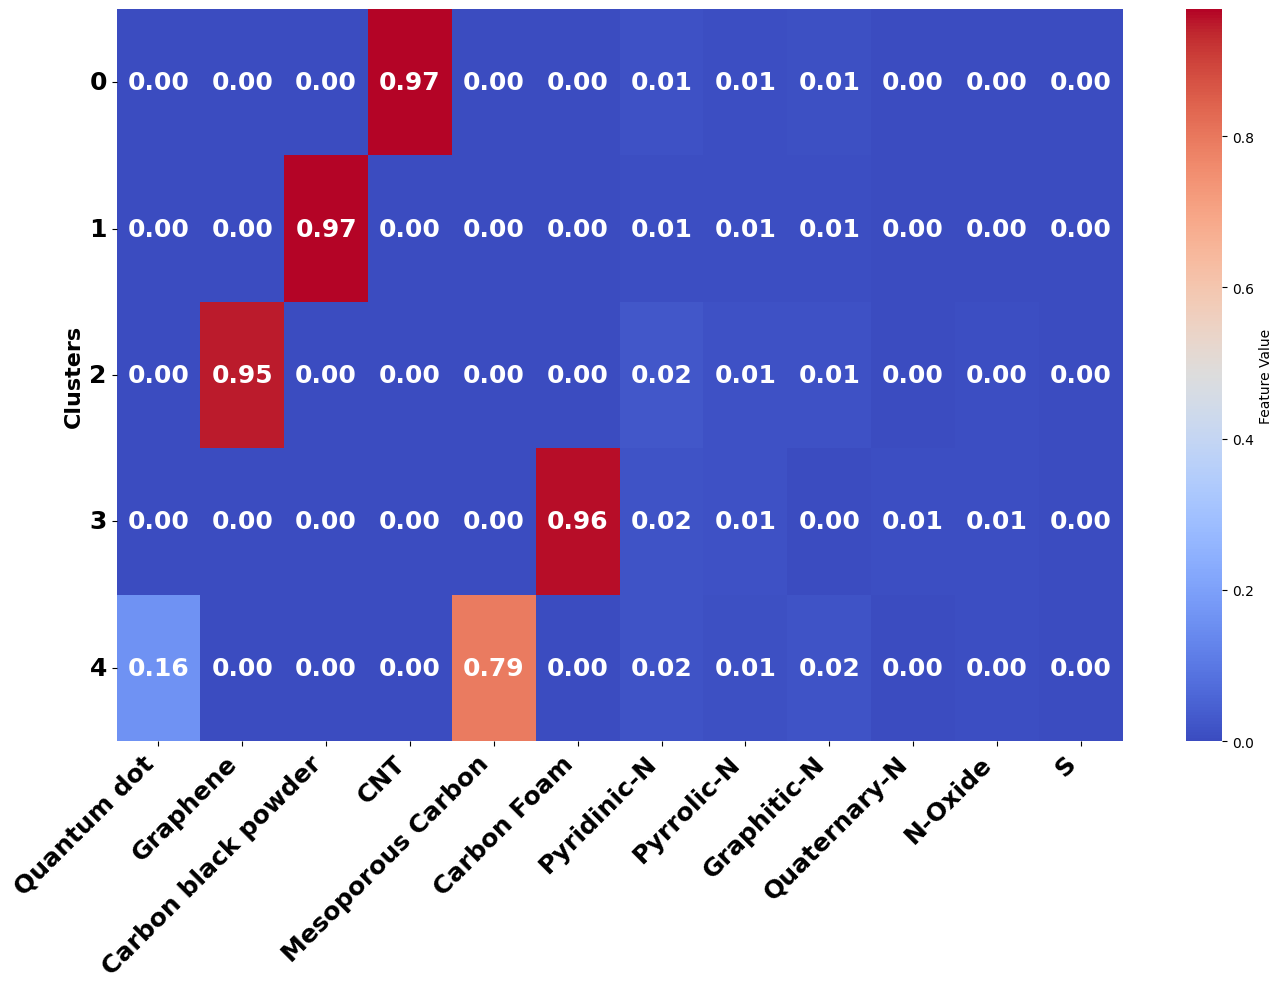

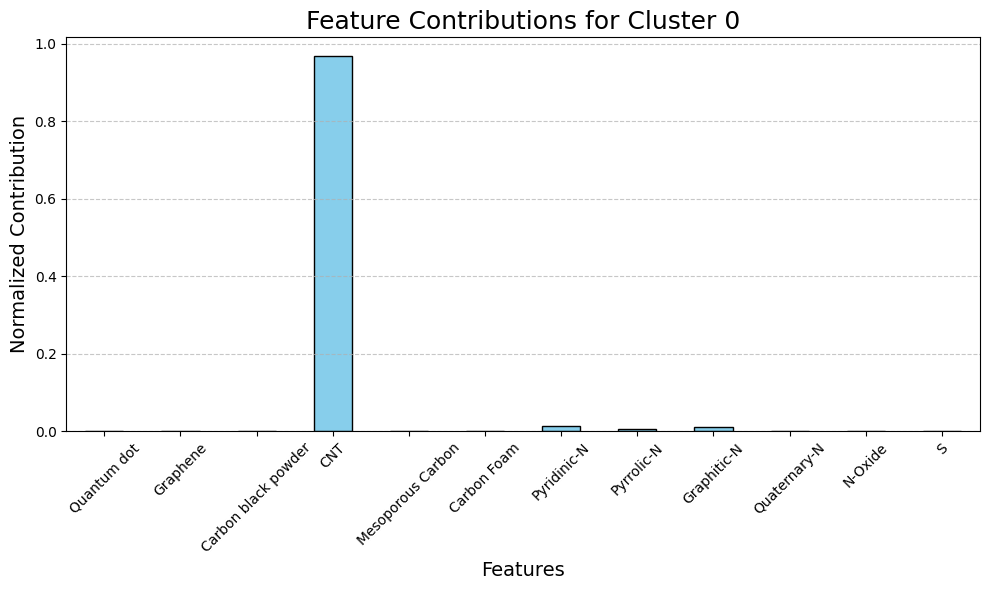

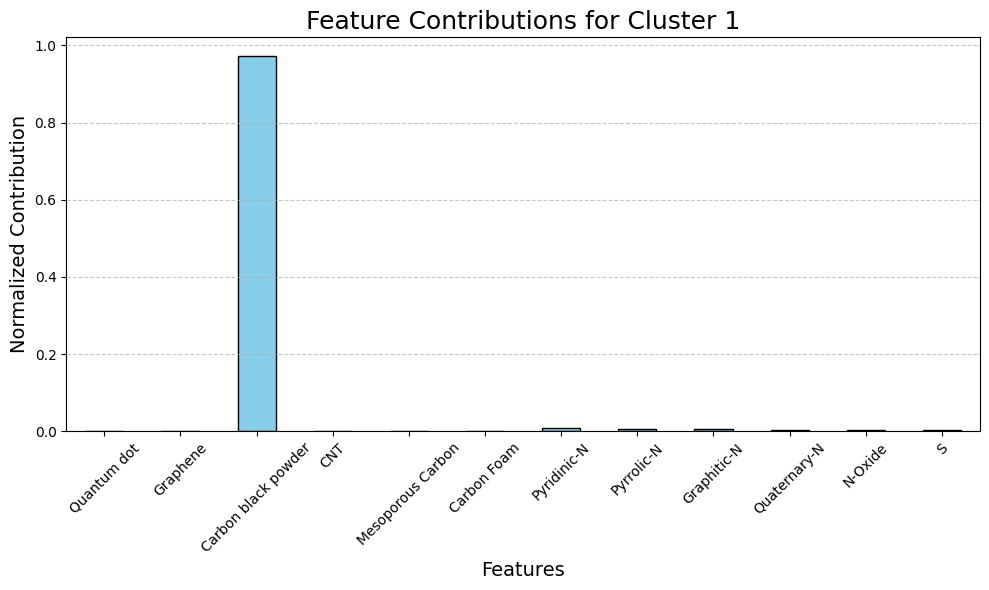

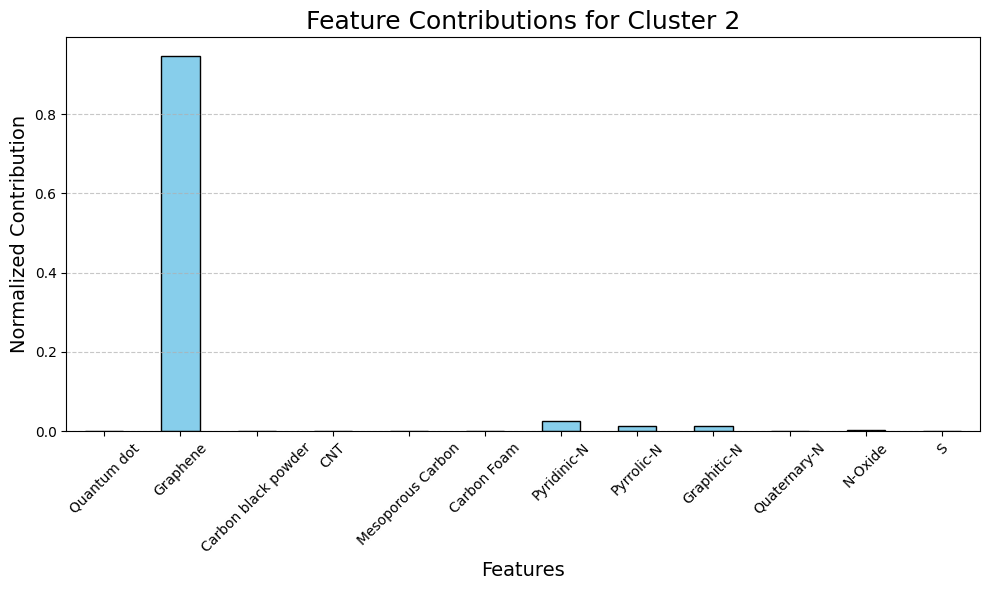

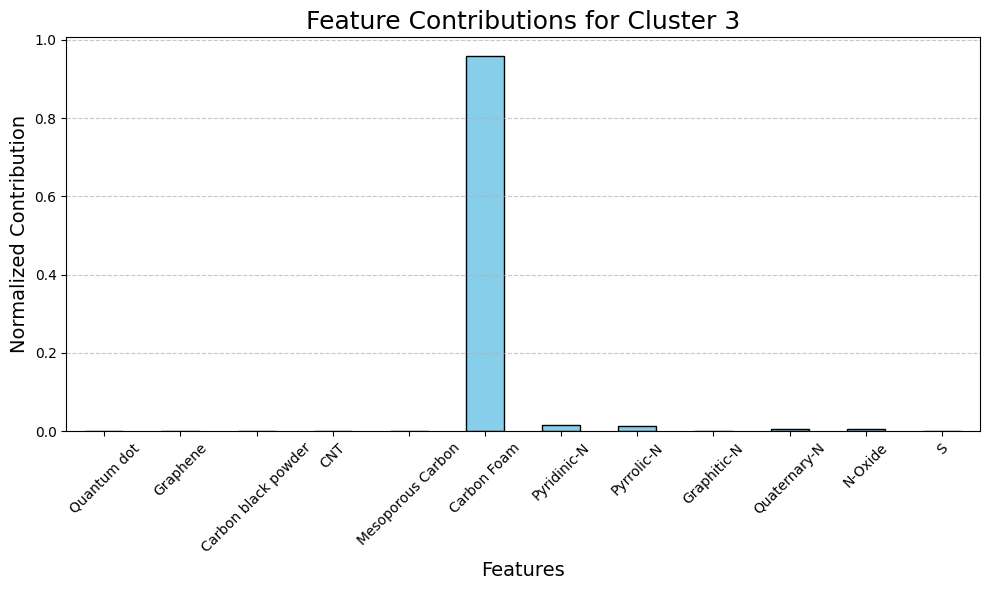

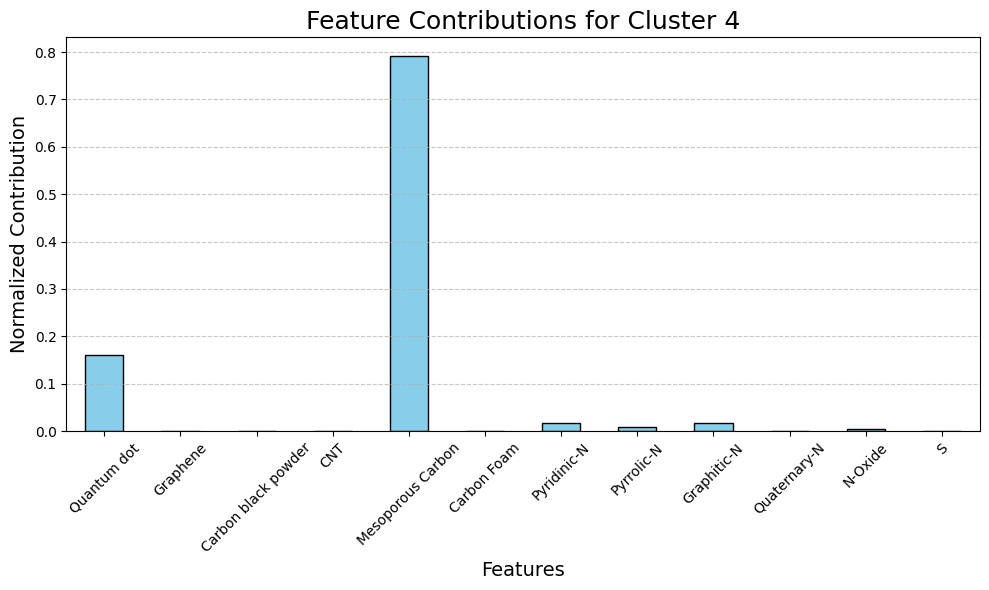

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for cluster summary
plt.figure(figsize=(14, 10))
ax = sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Feature Value"},
                 annot_kws={"fontsize": 18, "fontweight": "bold"})  # Increase annotation font size and make bold

plt.ylabel("Clusters", fontsize=16, fontweight='bold' )
plt.xticks(fontsize=18, fontweight='bold', rotation=45, ha='right')  # Features on x-axis
plt.yticks(fontsize=18, fontweight='bold', rotation=0)    
plt.tight_layout()

# Save the heatmap as a PNG file
plt.savefig("cluster_summary_heatmap.png", format="png", dpi=600, bbox_inches='tight')

# Display the heatmap
plt.show()

# Cluster-specific feature contributions as bar charts
# Normalize features for better visualization
normalized_summary = cluster_summary.div(cluster_summary.sum(axis=1), axis=0)

# Plot bar chart for each cluster
for cluster in normalized_summary.index:
    plt.figure(figsize=(10, 6))
    normalized_summary.loc[cluster].plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Feature Contributions for Cluster {cluster}", fontsize=18)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Normalized Contribution", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()




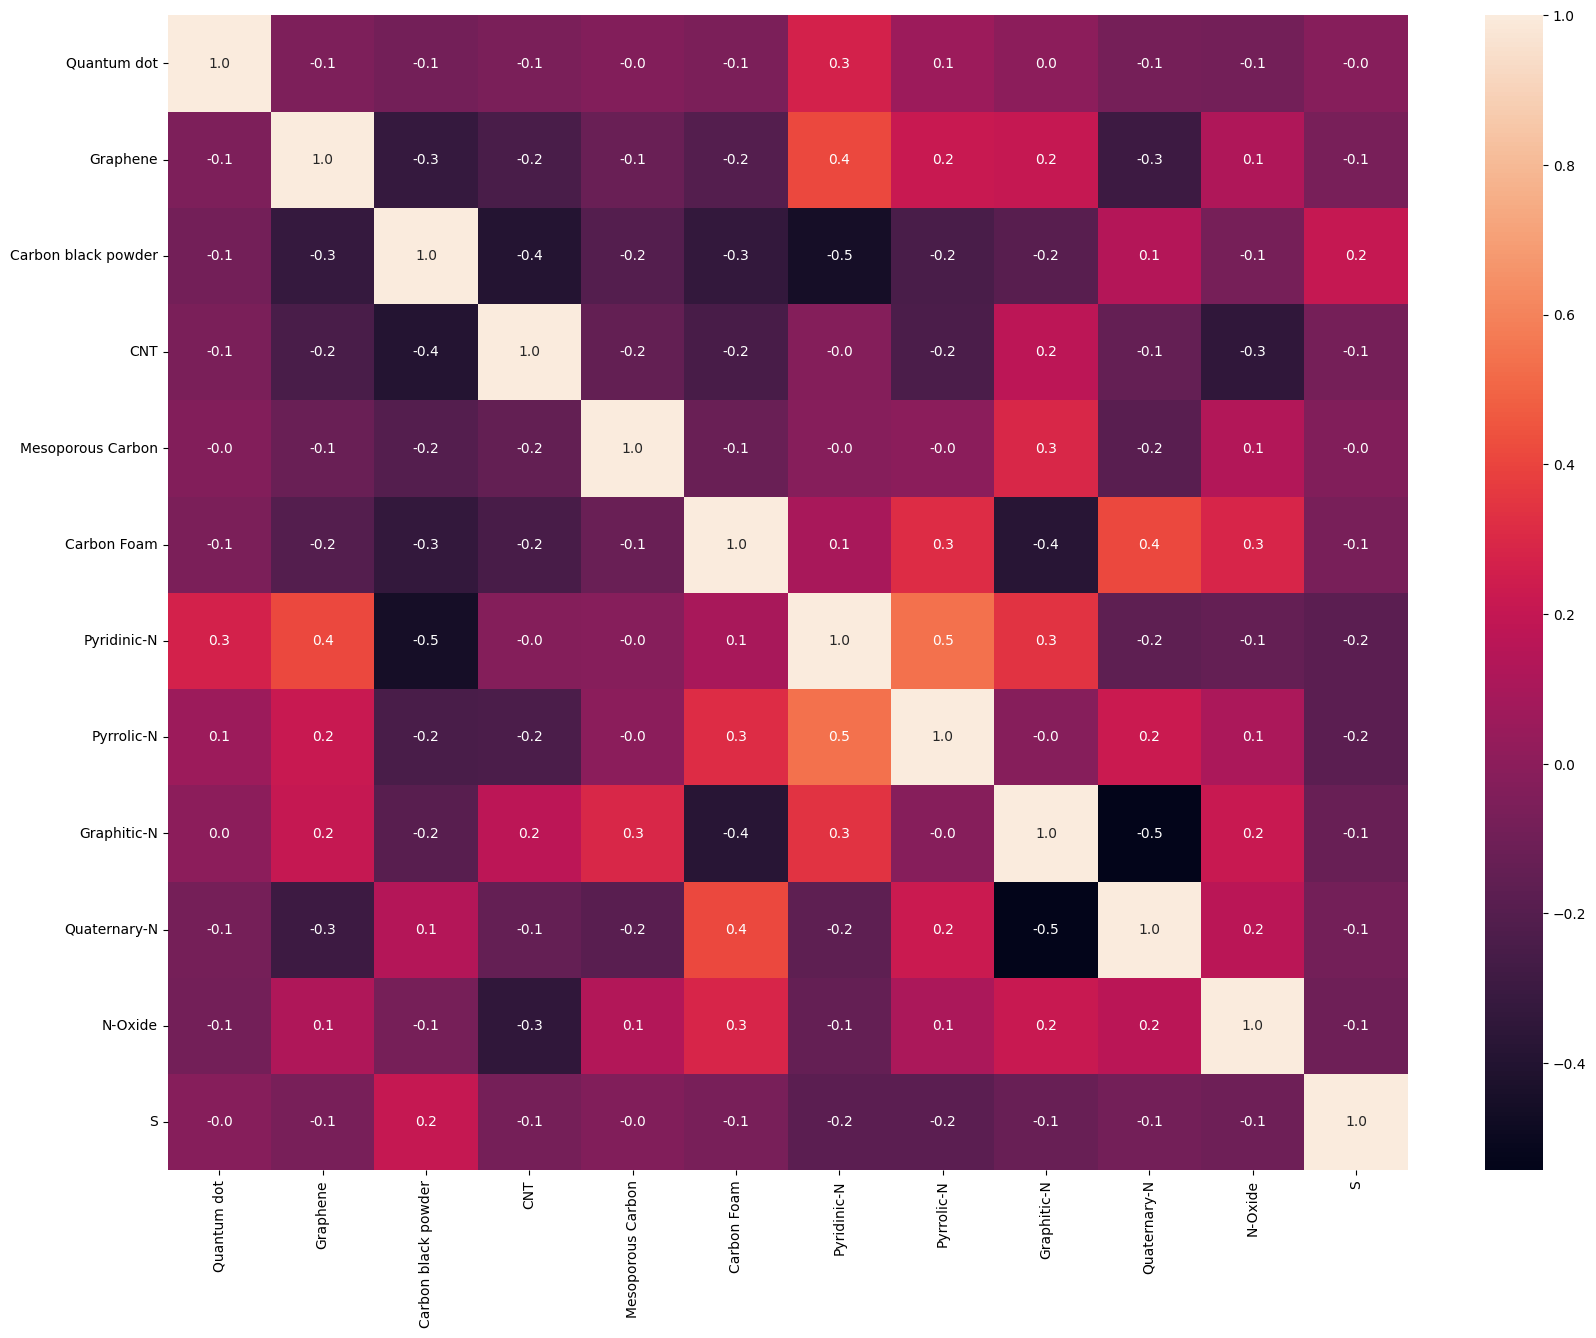

In [4]:
# Calculate correlation matrix
corr = X.corr()

# Create the heatmap
plt.subplots(figsize=(20, 15))
sns.heatmap(corr, annot=True, annot_kws={'size': 10}, fmt=".1f")

# Customize the tick labels
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Save the heatmap as a PNG file
plt.savefig('heatmap.png', dpi=300)  # You can adjust the DPI as needed

# Display the heatmap
plt.show()


C:\Users\ganes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


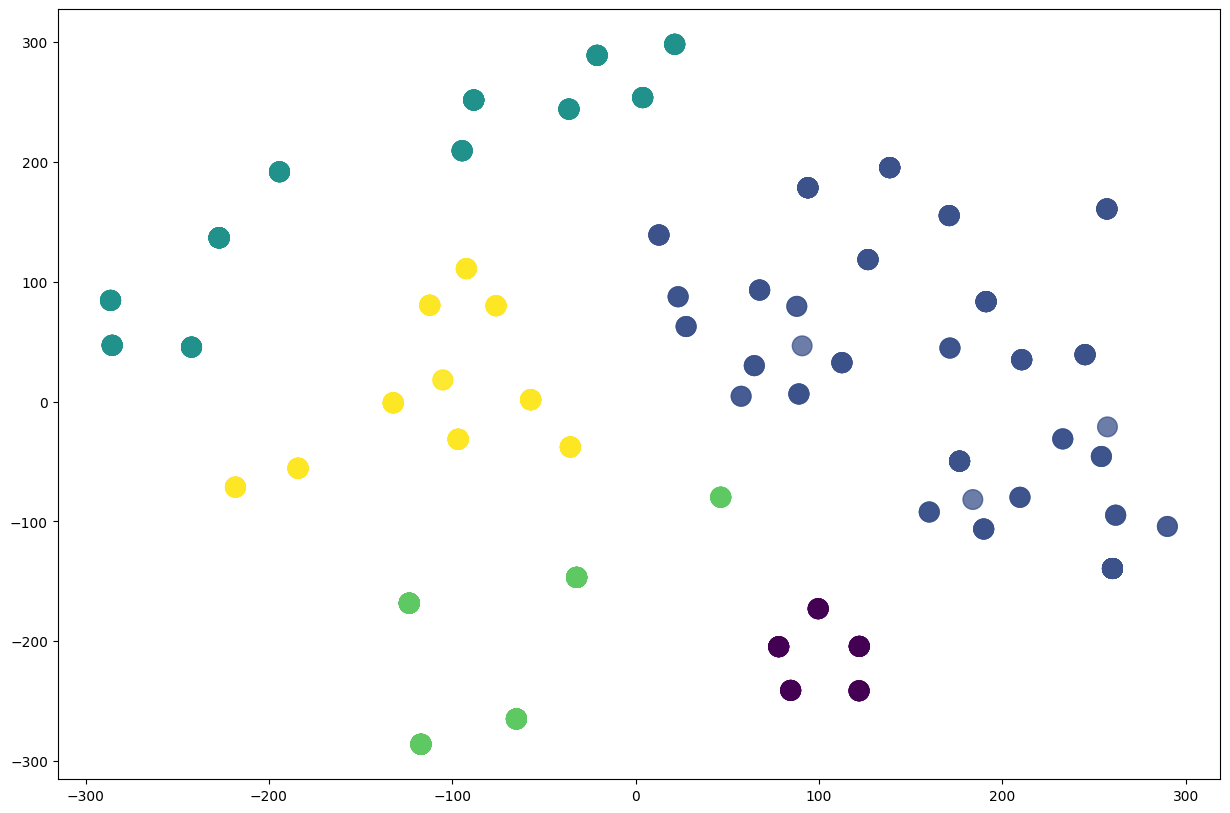

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Fit KMeans clustering
cluster = KMeans(n_clusters=5)
cluster.fit(X)
cluster_predictions = cluster.predict(X)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=1, n_iter=1000, perplexity=40, init="pca", learning_rate="auto")
tsne_EP = tsne.fit_transform(X)

# Create the t-SNE scatter plot
plt.figure(figsize=(15,10))
plot2 = plt.scatter(x=tsne_EP[:,0], y=tsne_EP[:,1], c=cluster_predictions, s=200, alpha=0.75)

# Customize tick label sizes
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

# Save the t-SNE plot as a PNG file
plt.savefig('tsne_plot.png', dpi=300)  # You can adjust the DPI as needed

# Display the plot
plt.show()
